In [1]:
from sklearn.datasets import load_iris
ld=load_iris()
dir(ld)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [2]:
ld.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
import pandas as pd
df=pd.DataFrame(ld.data,columns=['sepal length','sepal width','petal length','petal width'])
df.drop(df[['sepal length','sepal width']],axis='columns',inplace=True)
df.head()

,petal length,petal width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


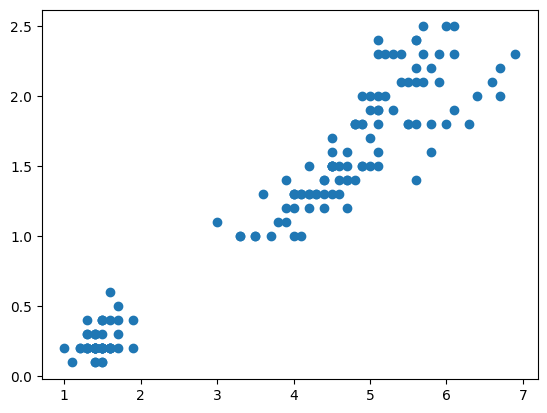

In [4]:
import matplotlib.pyplot as plt
plt.scatter(df[['petal length']],df[['petal width']])
plt.show()

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df[['petal length']])
df['petal length']=scaler.transform(df[['petal length']])
scaler.fit(df[['petal width']])
df['petal width']=scaler.transform(df[['petal width']])
df.head()

,petal length,petal width
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667


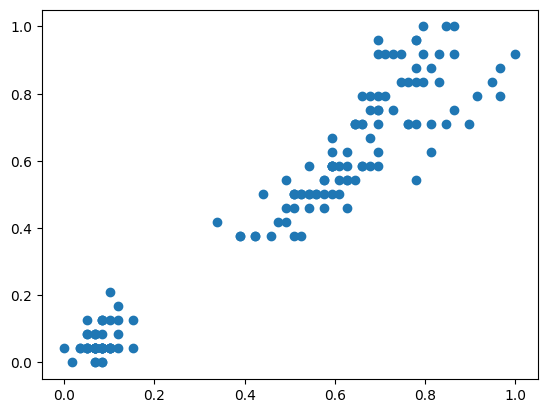

In [6]:
import matplotlib.pyplot as plt
plt.scatter(df[['petal length']],df[['petal width']])
plt.show()

In [7]:
from sklearn.cluster import KMeans
sse=[]
k_rng=range(1,10)
for k in k_rng:
    km1=KMeans(n_clusters=k)
    km1.fit(df[['petal length','petal width']])
    sse.append(km1.inertia_)
sse

c:\Users\sumit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sumit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sumit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sumit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

[28.368353219727194,
 5.176463590044368,
 1.7018746881920963,
 1.1588792731667124,
 0.8538617353912238,
 0.6825595781453081,
 0.566351649289804,
 0.4874422271104706,
 0.41326677825124736]

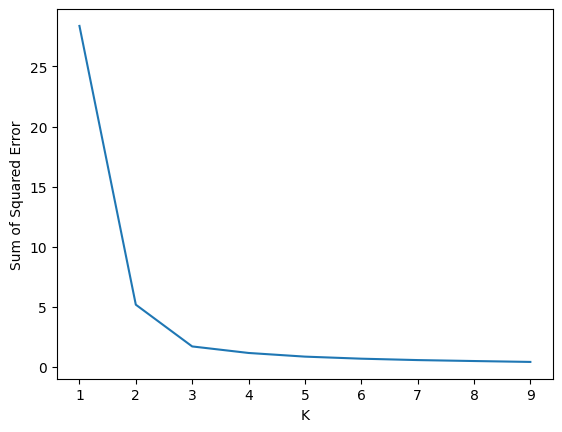

In [8]:
plt.plot(k_rng,sse)
plt.xlabel("K")
plt.ylabel("Sum of Squared Error")
plt.show()

In [9]:
km=KMeans(n_clusters=3)
y_predict=km.fit_predict(df[['petal length','petal width']])
y_predict

c:\Users\sumit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [10]:
df['predict']=y_predict
df.head()

,petal length,petal width,predict
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0


In [11]:
km.cluster_centers_

array([[0.07830508, 0.06083333],
       [0.7740113 , 0.81510417],
       [0.55867014, 0.51041667]])

In [12]:
df1=df[df.predict==0]
df2=df[df.predict==1]
df3=df[df.predict==2]

In [13]:
print(ld.target)
print(ld.target_names)
df1.head()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


,petal length,petal width,predict
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0


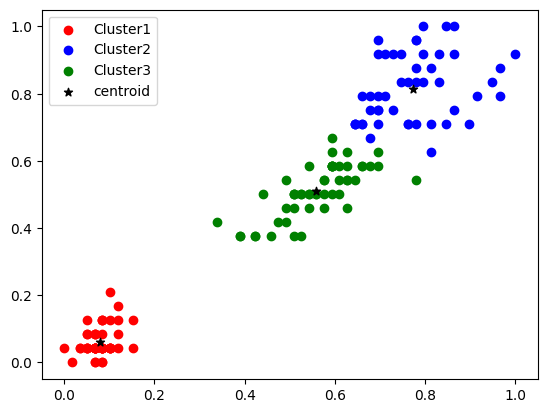

In [14]:
plt.scatter(df1[['petal length']],df1[['petal width']],color='r',label='Cluster1')
plt.scatter(df2[['petal length']],df2[['petal width']],color='b',label='Cluster2')
plt.scatter(df3[['petal length']],df3[['petal width']],color='g',label='Cluster3')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',label='centroid')
plt.legend()
plt.show()